In [ ]:
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt
from keras.api import layers
from keras.api.models import Sequential
from keras.api.layers import Flatten
from keras.api.utils import to_categorical
import numpy as np
import keras
import pandas as pd
import sys
sys.path.append("F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition")
from Datasets.DataLoader.DataLoader import DataLoader, LABELS

Libraries Loaded Successfully


In [2]:
DATASET1 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-1"
DATASET2 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-2"
DATASET3 = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\DS-3"
REAL_DATA = "F:\Programming\Python\Machine Learning\Persian-Alphabet-Recognition\Datasets\Real Data"

IMAGE_SIZE = 64
SHRINK = 10
INPUT_SHAPE = (64, 64)
CLASSES = 43
THRESHOLD = 100

EPOCHS = 20
N_ESTIMATORS = 4

Loading Files and Dataset ...
Found Categories: ['1-alef', '2-b', '3-p', '4-t', '5-se', '6-jim', '7-che', '8-h', '9-kh', '10-d', '11-zal', '12-r', '13-z', '14-zh', '15-sin', '16-shin', '17-sad', '18-zad', '19-t-long', '20-z-long', '21-ayin', '22-ghyin', '23-f', '24-ghe', '25-k', '26-g', '27-le', '28-m', '29-n', '30-v', '31-he', '32-ye', '33-zero', '34-one', '35-two', '36-three', '37-four', '38-five', '39-six', '40-seven', '41-eight', '42-nine', '43-anewfive'] 

X-Train : (3439, 64, 64)
X-Test : (860, 64, 64)
Y-Train : (3439,)
Y-Test : (860,)


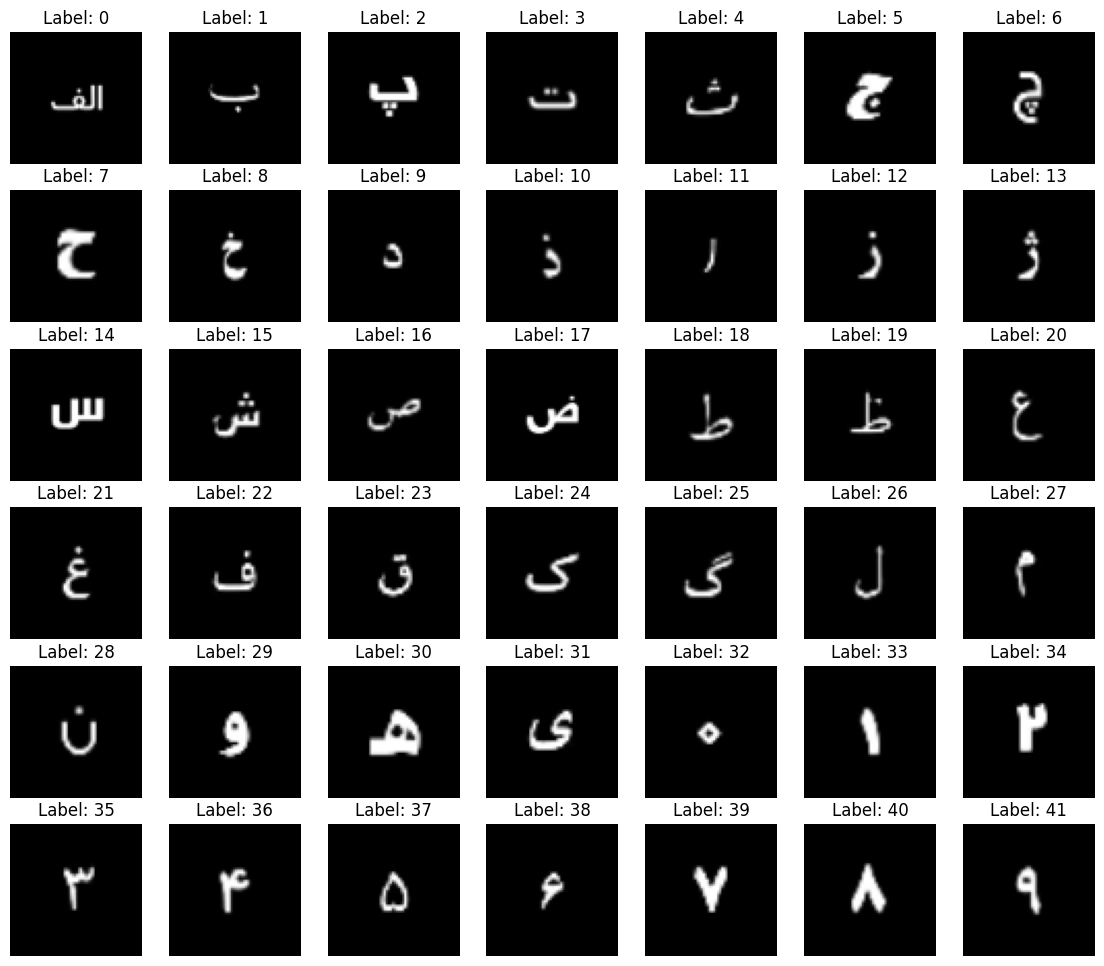

In [3]:
dataloader = DataLoader(path=DATASET1, image_size=IMAGE_SIZE, shrink=SHRINK, contrast=None, zoom=0.45, padding=0, invert=True)
X_train, y_train, X_test, y_test = dataloader.load_data()


print(f"X-Train : {X_train.shape}")
print(f"X-Test : {X_test.shape}")
print(f"Y-Train : {y_train.shape}")
print(f"Y-Test : {y_test.shape}")

X_train_1d = np.array(Flatten()(X_train))
X_test_1d = np.array(Flatten()(X_test))

used=[]
counter = 0
i = 0
plt.figure(figsize=(14, 12))
while counter != 42:
    while y_train[i] in used or y_train[i]!=counter:
        i+=1
        continue
    used.append(y_train[i])
    plt.subplot(6, 7, counter + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
    counter+=1
plt.show()

In [4]:
cnn = Sequential(name='Model_2')

cnn.add(layers.Input(shape=INPUT_SHAPE))
cnn.add(layers.Reshape(target_shape=(1, INPUT_SHAPE[0], INPUT_SHAPE[1])))

cnn.add(layers.Conv2D(filters=4, kernel_size=7, strides=1, data_format='channels_first', use_bias=True, name='Convolutional_1'))
cnn.add(layers.BatchNormalization(name='Batch_Normalization_1'))
cnn.add(layers.MaxPooling2D(strides=2, data_format='channels_first', name='Max_Pooling_1'))
cnn.add(layers.Dropout(0.25 , name='Drop_out_1'))
cnn.add(layers.Conv2D(filters=8, kernel_size=6, strides=1, data_format='channels_first', use_bias=True, name='Convolutional_2'))
cnn.add(layers.BatchNormalization(name='Batch_Normalization_2'))
cnn.add(layers.MaxPooling2D(strides=2, data_format='channels_first', name='Max_Pooling_2'))
cnn.add(layers.Dropout(0.25 , name='Drop_out_2'))
cnn.add(layers.Flatten(data_format='channels_first', name='Flattening'))
cnn.add(layers.Dense(512, activation='relu', use_bias=True, name='Fully_Connected_1'))
cnn.add(layers.Dense(256, activation='relu', use_bias=True, name='Fully_Connected_2'))
cnn.add(layers.Dense(CLASSES, activation='softmax', use_bias=True, name='Fully_Connected_3'))

cnn.summary()

cnn.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

Model: "Model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ reshape (Reshape)               │ (None, 1, 64, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Convolutional_1 (Conv2D)        │ (None, 4, 58, 58)      │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Batch_Normalization_1           │ (None, 4, 58, 58)      │           232 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pooling_1 (MaxPooling2D)    │ (None, 4, 29, 29)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_out_1 (Dropout)            │ (None, 4, 29, 29)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Convolutional_2 (Conv2D)        │ (None, 8, 24, 24)      │         1,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Batch_Normalization_2           │ (None, 8, 24, 24)      │            96 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Max_Pooling_2 (MaxPooling2D)    │ (None, 8, 12, 12)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Drop_out_2 (Dropout)            │ (None, 8, 12, 12)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flattening (Flatten)            │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_1 (Dense)       │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_2 (Dense)       │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Fully_Connected_3 (Dense)       │ (None, 43)             │        11,051 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 734,403 (2.80 MB)

 Trainable params: 734,239 (2.80 MB)

 Non-trainable params: 164 (656.00 B)

In [5]:
ann = Sequential(name='Model-1')

ann.add(layers.Input(shape=INPUT_SHAPE))
ann.add(layers.Flatten())
ann.add(layers.Dense(units=2048, activation='relu', use_bias=True, name='Dense_1'))
ann.add(layers.Dense(units=1024, activation='relu', use_bias=True, name='Dense_2'))
ann.add(layers.Dense(units=512, activation='relu', use_bias=True, name='Dense_3'))
ann.add(layers.Dense(units=256, activation='relu', use_bias=True, name='Dense_4'))
ann.add(layers.Dense(units=64, activation='relu', use_bias=True, name='Dense_5'))
ann.add(layers.Dense(units=CLASSES, activation='softmax', use_bias=True, name='Dense_6'))

ann.summary()

ann.compile(optimizer='adam', loss=keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

Model: "Model-1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 2048)           │     8,390,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_2 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_5 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_6 (Dense)                 │ (None, 43)             │         2,795 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,164,203 (42.59 MB)

 Trainable params: 11,164,203 (42.59 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# Logistic Regression

# >> Best Params : {'C': 100, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
# >> Best Score : 0.9177109779628312

logreg = LogisticRegression(C=100, max_iter=100, penalty='l2', solver='lbfgs')

In [7]:
# KNN Classifier

# >> Best Params : {'metric': 'euclidean', 'n_neighbors': 3, 'p': 0.5, 'weights': 'distance'}
# >> Best Score : 0.8801995531633999

knn = KNeighborsClassifier(metric='euclidean', n_neighbors=3, p=0.5, weights='distance')

In [8]:
class StackingClassifier_1D:
    def __init__(self, estimators : dict) -> None:
        self.estimators = estimators

    
    def fit(self, x, y):
        for name, estimator in self.estimators.items():
            print(f">> Fitting {name} on the Data ...")
            try:    
                estimator.fit(x, y)
            except:
                print(f"[ERROR] : Could not Fit {name} on the Data!")

    
    def predict(self, x):
        preds = []
        for name, estimator in self.estimators.items():
            print(f">> {name} Predicting the Data ...")
            try:    
                preds.append(estimator.predict(x))
            except:
                print(f"[ERROR] : {name} Could not Predict the Given Data!")

        # Voting
        result = np.apply_along_axis(lambda t: np.bincount(t).argmax(), axis=0, arr=preds)

        return result
    

    def score(self, x, y):
        predictions = self.predict(x)
        return accuracy_score(y, predictions)

In [9]:
models = {'CNN' : cnn,
          'ANN' : ann,
          'KNN' : knn,
          'Logistic Regression' : logreg}

models_1d = {'KNN' : knn,
             'LogisticRegression' : logreg}

models_2d = {'CNN' : cnn,
             'ANN' : ann}

In [10]:
stacked_1d = StackingClassifier(estimators=[('KNN', knn), ('LogisticRegression', logreg)], verbose=2, n_jobs=-1)
stacked_1d.fit(X_train_1d, y_train)
stacked_1d.score(X_test_1d, y_test)

0.9406976744186046

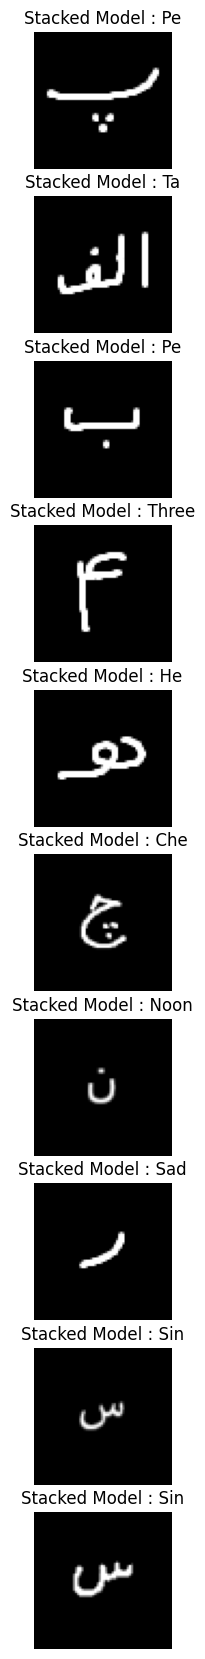

In [24]:
import os
import cv2 as cv

rows = len(os.listdir(REAL_DATA))

plt.figure(figsize=(4, 21))

for i,img_name in enumerate(os.listdir(REAL_DATA)):
    
    image_path = os.path.join(REAL_DATA, img_name)

    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    image = dataloader.centerize(image)

    predictions_test = stacked_1d.predict(image.reshape(1,INPUT_SHAPE[0]*INPUT_SHAPE[1]))

    plt.subplot(rows, 2, 2*i+1)
    plt.imshow(image, cmap='gray')
    plt.title(f'Stacked Model : {LABELS[predictions_test[0]]}')
    plt.axis('off')

plt.show()

In [ ]:
for name, model in models_1d.items():
    print(f">> Fitting {name} on the Data : ")
    model.fit(X_train_1d, y_train)


>> Fitting KNN on the Data : 
>> Fitting LogisticRegression on the Data : 


In [15]:
cnn.fit(x=X_train, y=y_train, batch_size=32, epochs=EPOCHS)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 101ms/step - accuracy: 0.3650 - loss: 2.4114
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.8015 - loss: 0.6019
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.8650 - loss: 0.3885
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.9071 - loss: 0.2705
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.9002 - loss: 0.2621
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.9255 - loss: 0.2260
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.9316 - loss: 0.1887
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.9429 - loss: 0.1646
Epoch 9/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 99ms/step - accuracy: 0.9434 - loss: 0.1524
Epoch 10/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.9606 - loss: 0.1021
Epoch 11/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 11s 100ms/step - accuracy: 0.9451 - loss: 0.1483
Epoch 12/20
108/108 

In [16]:
cnn.evaluate(X_test, y_test)[1]

27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.9239 - loss: 0.2834


0.9418604373931885

In [17]:
ann.fit(x=X_train, y=y_train, batch_size=32, epochs=EPOCHS)

Epoch 1/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.3311 - loss: 2.4673
Epoch 2/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step - accuracy: 0.8348 - loss: 0.4877
Epoch 3/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.8934 - loss: 0.3304
Epoch 4/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9235 - loss: 0.2260
Epoch 5/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9466 - loss: 0.1496
Epoch 6/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9380 - loss: 0.2004
Epoch 7/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9535 - loss: 0.1451
Epoch 8/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9576 - loss: 0.1451
Epoch 9/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9656 - loss: 0.1094
Epoch 10/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9740 - loss: 0.0831
Epoch 11/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.9823 - loss: 0.0488
Epoch 12/20
108/108 ━━━━━━━━━━━━━━━━━━━━ 

In [18]:
ann.evaluate(X_test, y_test)[1]

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9373 - loss: 0.3769


0.9372093081474304

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

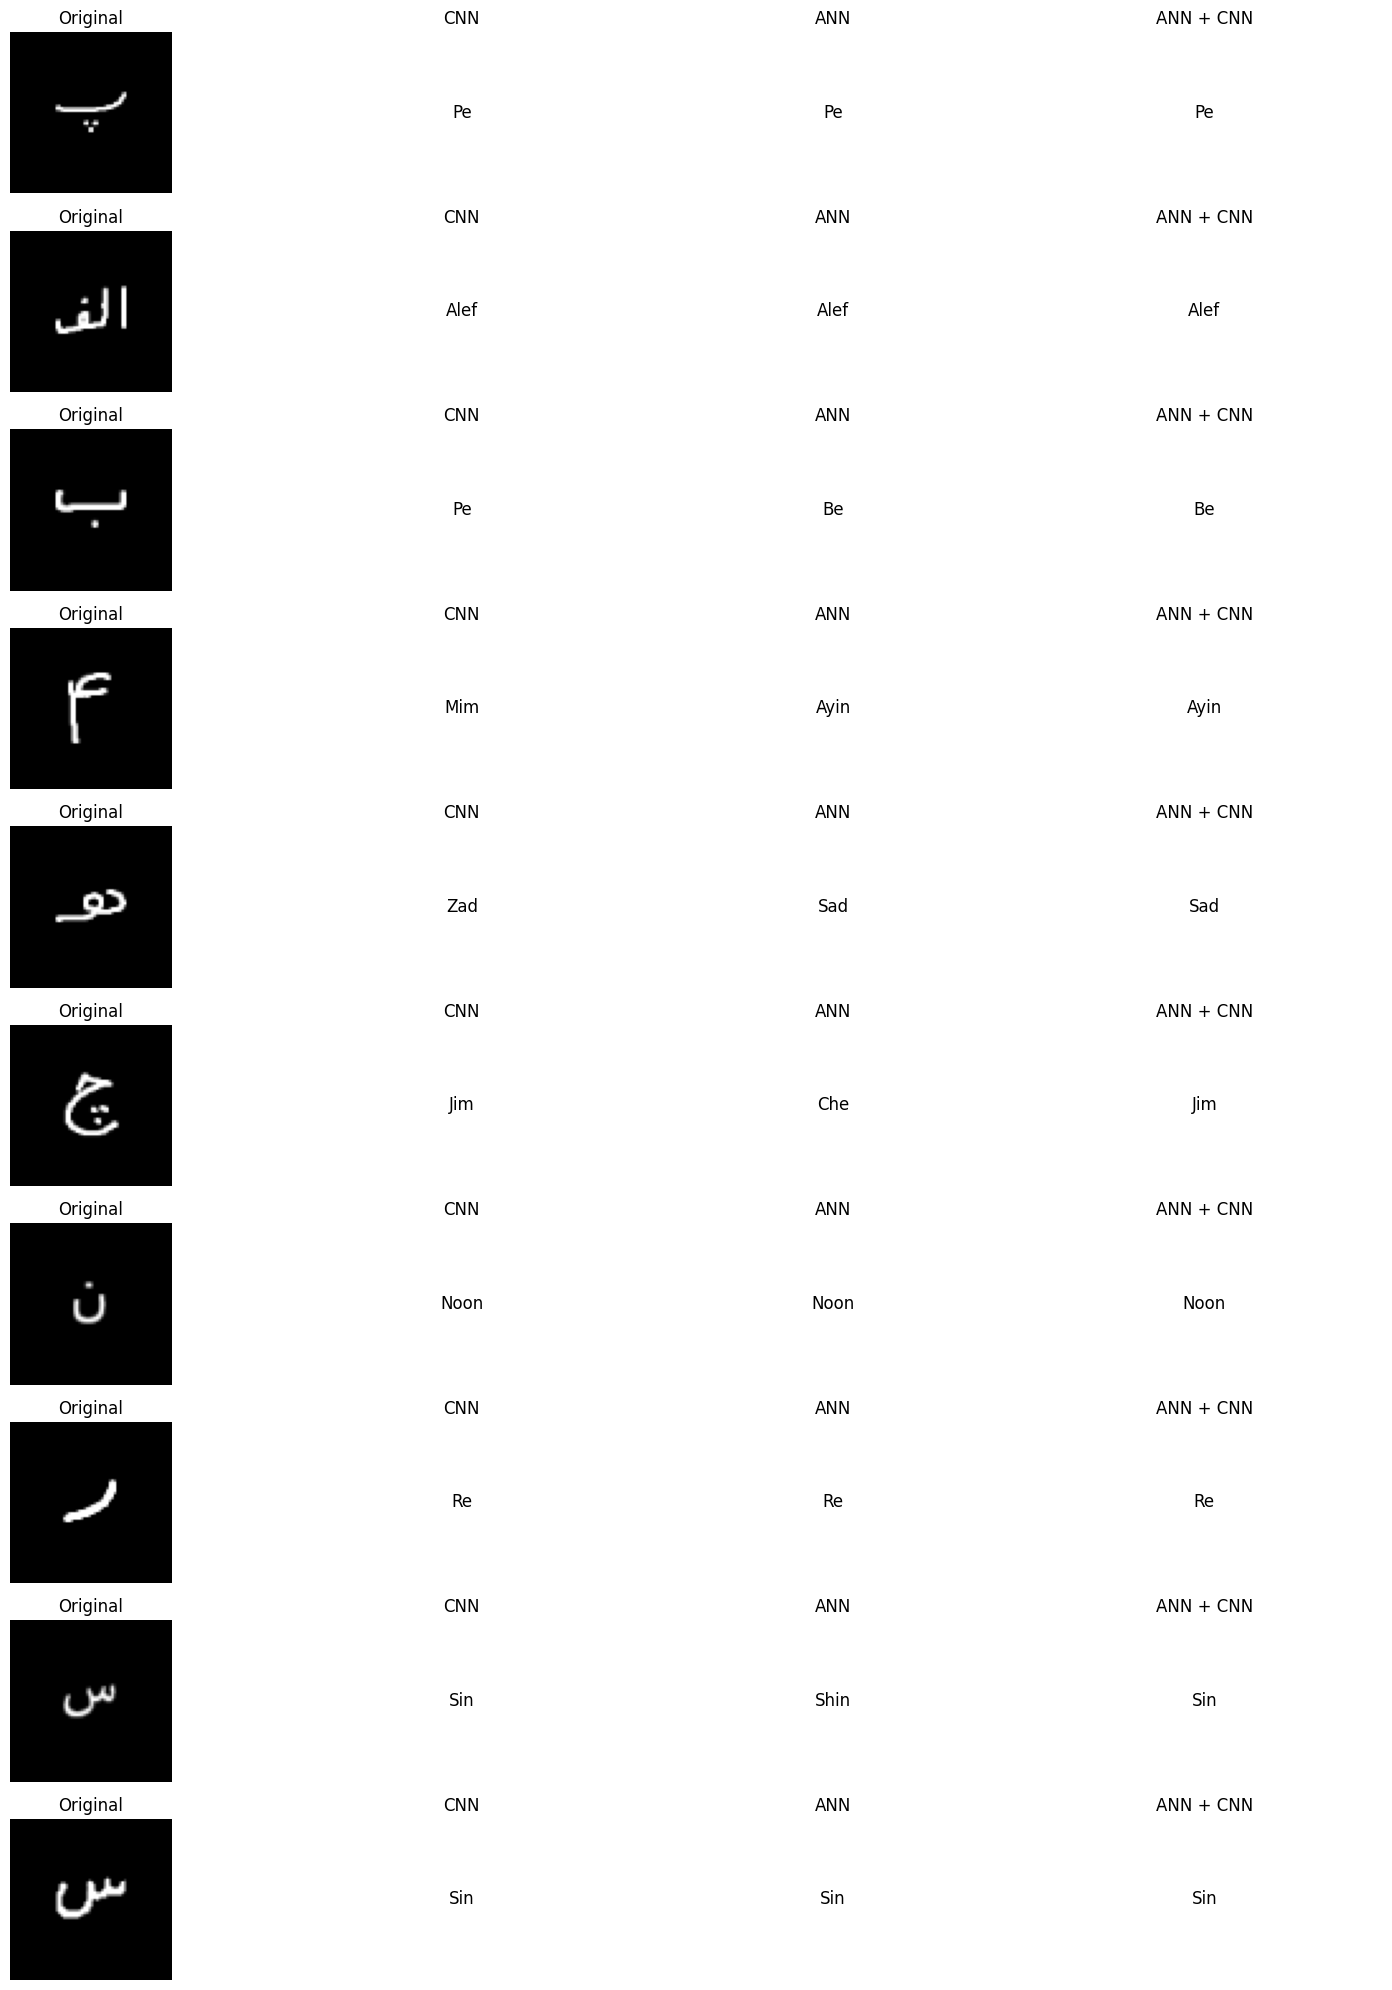

In [19]:
import os
import cv2 as cv

num_images = len(os.listdir(REAL_DATA))
num_models = 3
plt.figure(figsize=(15, num_images * 2))

for i, img_name in enumerate(os.listdir(REAL_DATA)):
    image_path = os.path.join(REAL_DATA, img_name)
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    image = dataloader.centerize(image)  
    image = dataloader.normalize(image)

    plt.subplot(num_images, num_models + 1, i * (num_models + 1) + 1)  
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off') 

    for j, (name, model) in enumerate(models_2d.items()):
        prediction = model.predict(image.reshape(1, INPUT_SHAPE[0], INPUT_SHAPE[1]))
        pred = (np.argmax(prediction))  

        plt.subplot(num_images, num_models + 1, i * (num_models + 1) + j + 2)
        plt.text(0.5, 0.5, str(LABELS[pred]), fontsize=12, ha='center', va='center')
        plt.title(name)
        plt.axis('off') 

    pred1 = ann.predict(image.reshape(1, INPUT_SHAPE[0], INPUT_SHAPE[1]))
    pred2 = cnn.predict(image.reshape(1, INPUT_SHAPE[0], INPUT_SHAPE[1]))
    stacked = (np.argmax(pred1 + pred2))

    plt.subplot(num_images, num_models + 1, i * (num_models + 1) + 2 + 2)
    plt.text(0.5, 0.5, str(LABELS[stacked]), fontsize=12, ha='center', va='center')
    plt.title('ANN + CNN')
    plt.axis('off') 


plt.tight_layout()
plt.show()

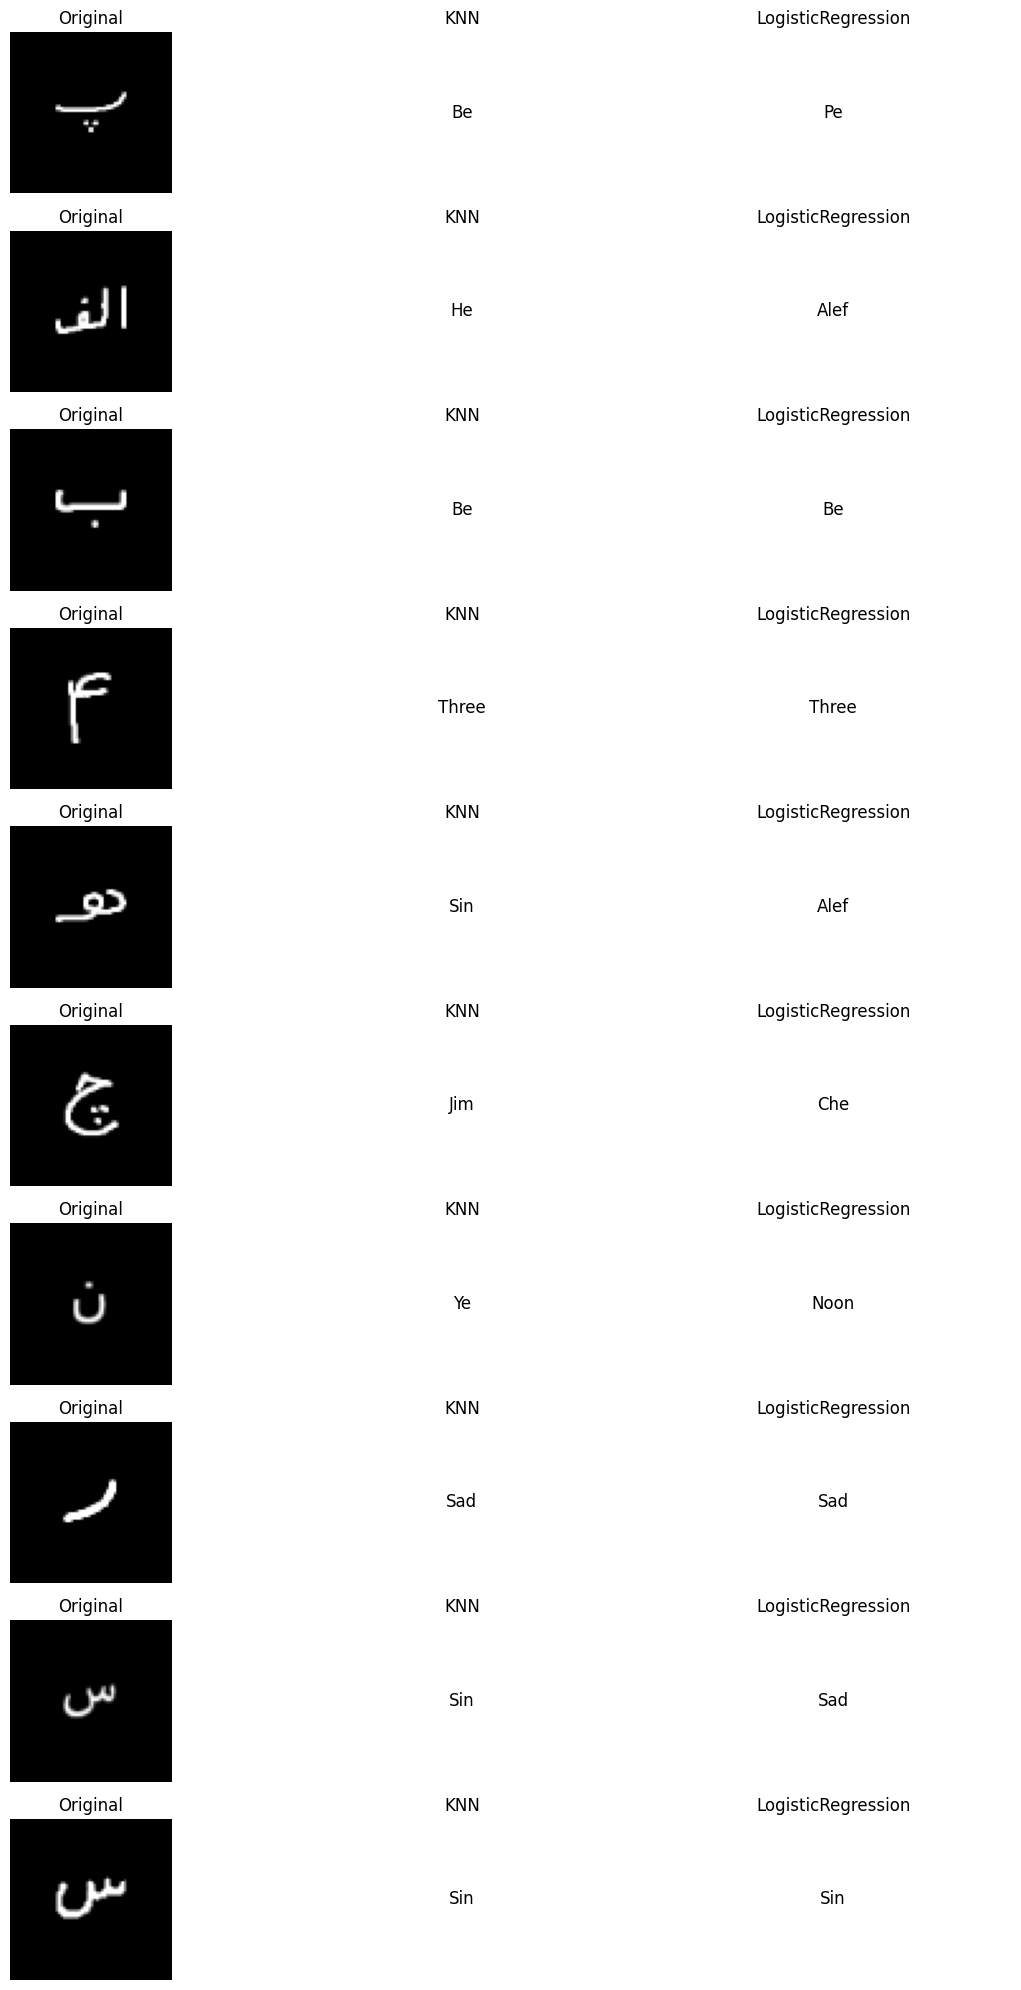

In [ ]:
import os
import cv2 as cv

num_images = len(os.listdir(REAL_DATA))
num_models = 3
plt.figure(figsize=(15, num_images * 2))

for i, img_name in enumerate(os.listdir(REAL_DATA)):
    image_path = os.path.join(REAL_DATA, img_name)
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    image = dataloader.centerize(image)  
    image = dataloader.normalize(image)

    plt.subplot(num_images, num_models + 1, i * (num_models + 1) + 1)  
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off') 

    for j, (name, model) in enumerate(models_1d.items()):
        prediction = model.predict(image.reshape(1, INPUT_SHAPE[0]*INPUT_SHAPE[1]))

        plt.subplot(num_images, num_models + 1, i * (num_models + 1) + j + 2)
        plt.text(0.5, 0.5, str(LABELS[prediction[0]]), fontsize=12, ha='center', va='center')
        plt.title(name)
        plt.axis('off')


plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


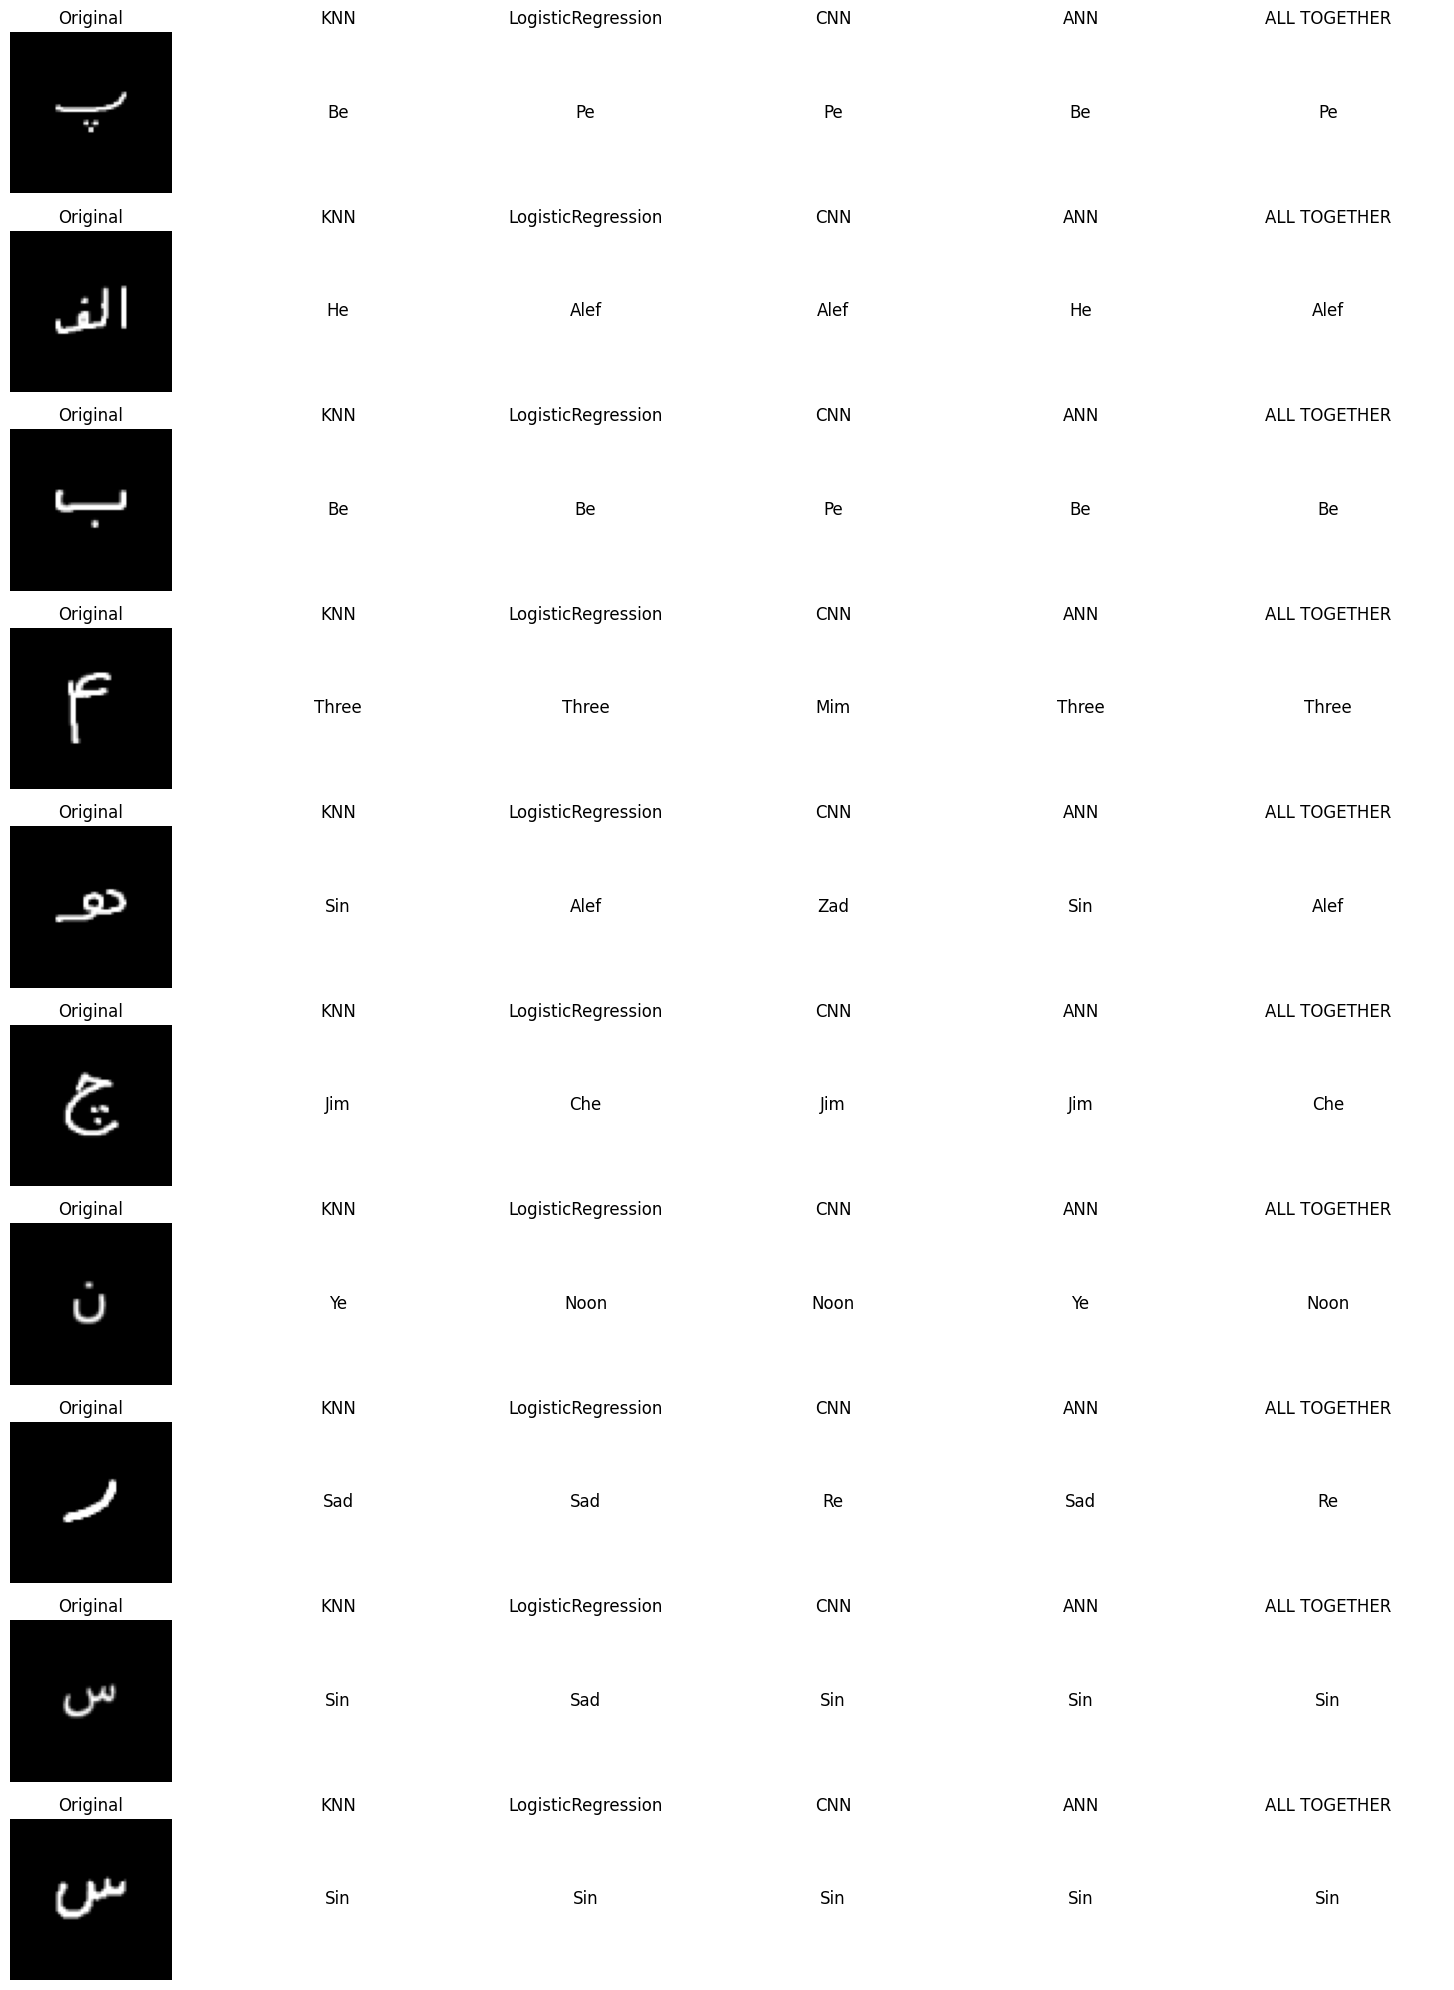

In [22]:
import os
import cv2 as cv

num_images = len(os.listdir(REAL_DATA))
num_models = 5
plt.figure(figsize=(15, num_images * 2))

for i, img_name in enumerate(os.listdir(REAL_DATA)):
    image_path = os.path.join(REAL_DATA, img_name)
    image = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    image = dataloader.centerize(image)  
    image = dataloader.normalize(image)

    plt.subplot(num_images, num_models + 1, i * (num_models + 1) + 1)  
    plt.imshow(image, cmap='gray')
    plt.title('Original')
    plt.axis('off') 

    j=0
    
    knn_pred = knn.predict_proba(image.reshape(1, INPUT_SHAPE[0] * INPUT_SHAPE[1]))
    plt.subplot(num_images, num_models + 1, i * (num_models + 1) + j + 2)
    plt.text(0.5, 0.5, str(LABELS[np.argmax(knn_pred)]), fontsize=12, ha='center', va='center')
    plt.title('KNN')
    plt.axis('off') 
    j+=1


    logreg_pred = logreg.predict_proba(image.reshape(1, INPUT_SHAPE[0] * INPUT_SHAPE[1]))
    plt.subplot(num_images, num_models + 1, i * (num_models + 1) + j + 2)
    plt.text(0.5, 0.5, str(LABELS[np.argmax(logreg_pred)]), fontsize=12, ha='center', va='center')
    plt.title('LogisticRegression')
    plt.axis('off') 
    j+=1


    cnn_pred = cnn.predict(image.reshape(1, INPUT_SHAPE[0] , INPUT_SHAPE[1]))
    plt.subplot(num_images, num_models + 1, i * (num_models + 1) + j + 2)
    plt.text(0.5, 0.5, str(LABELS[np.argmax(cnn_pred)]), fontsize=12, ha='center', va='center')
    plt.title('CNN')
    plt.axis('off') 
    j+=1


    ann_pred = ann.predict(image.reshape(1, INPUT_SHAPE[0] , INPUT_SHAPE[1]))
    plt.subplot(num_images, num_models + 1, i * (num_models + 1) + j + 2)
    plt.text(0.5, 0.5, str(LABELS[np.argmax(knn_pred)]), fontsize=12, ha='center', va='center')
    plt.title('ANN')
    plt.axis('off') 
    j+=1
    

    stacked = (ann_pred + cnn_pred + logreg_pred + knn_pred)
    plt.subplot(num_images, num_models + 1, i * (num_models + 1) + j + 2)
    plt.text(0.5, 0.5, str(LABELS[np.argmax(stacked)]), fontsize=12, ha='center', va='center')
    plt.title('ALL TOGETHER')
    plt.axis('off') 
    j+=1


plt.tight_layout()
plt.show()